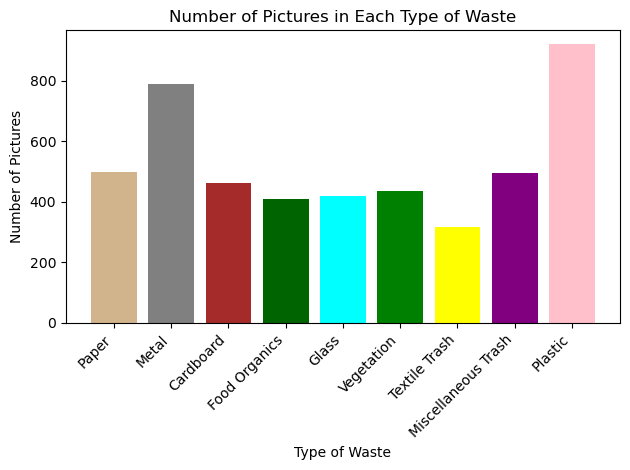

In [1]:
import os
import matplotlib.pyplot as plt

# into the RealWaste folder
realwaste_path = "realwaste-main/RealWaste"

# category names and corresponding colors
category_colors = {
    'Cardboard': 'brown',
    'Food Organics': 'darkgreen',
    'Glass': 'cyan',
    'Metal': 'grey',
    'Miscellaneous Trash': 'purple',
    'Paper': 'tan',
    'Plastic': 'pink',
    'Textile Trash': 'yellow',
    'Vegetation': 'green'
}

# category names and corresponding image counts
categories = []
image_counts = []

# through each subfolder
for category_folder in os.listdir(realwaste_path):
    category_path = os.path.join(realwaste_path, category_folder)
    
    # check if it's a directory
    if os.path.isdir(category_path):
        categories.append(category_folder)
        
        # count # images in the category
        image_count = len(os.listdir(category_path))
        image_counts.append(image_count)

# bar graph:
colors = [category_colors[category] for category in categories]
plt.bar(categories, image_counts, color=colors)
plt.xlabel('Type of Waste')
plt.ylabel('Number of Pictures')
plt.title('Number of Pictures in Each Type of Waste')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()

# Show the plot
plt.show()


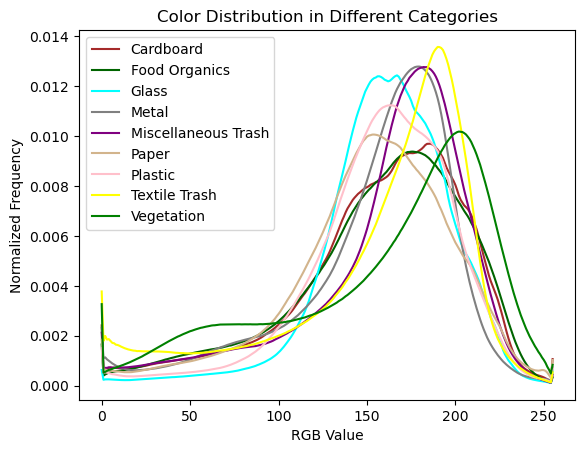

In [2]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

# into RealWaste folder
realwaste_path = "realwaste-main/RealWaste"

# categories
valid_categories = ['Cardboard', 'Food Organics', 'Glass', 'Metal', 'Miscellaneous Trash', 'Paper', 'Plastic', 'Textile Trash', 'Vegetation']

# calculate color distribution for an image
def calculate_color_distribution(image_path):
    # read the image
    try:
        image = Image.open(image_path)
    except Exception as e:
        print(f"Error opening image {image_path}: {e}")
        return None
    # into RGB 
    image_rgb = image.convert("RGB")
    # flatten 2D into 1D array of RGB values
    pixels = np.array(image_rgb).reshape((-1, 3))
    # calculate the histogram of RGB values
    histogram, bins = np.histogram(pixels, bins=256, range=[0, 256])
    # normalize the histogram
    histogram = histogram / histogram.sum()

    return histogram

# store color distributions for each category
color_distributions = []

# iterate through each valid category
for category in valid_categories:
    category_path = os.path.join(realwaste_path, category)
    # store color distributions for each image in the category
    category_color_distributions = []
    # iterate through each image in the category
    for image_file in os.listdir(category_path):
        image_path = os.path.join(category_path, image_file)
        # check if it's a valid image file
        if not image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            continue
        # calculate color distribution for the image
        color_distribution = calculate_color_distribution(image_path)
        # apped the color distribution to the list
        if color_distribution is not None:
            category_color_distributions.append(color_distribution)
    # calculate the average color distribution for the category
    average_color_distribution = np.mean(category_color_distributions, axis=0)
    # append the average color distribution to the main list
    color_distributions.append(average_color_distribution)

# plot 
for idx, (category_color_distribution, category) in enumerate(zip(color_distributions, valid_categories)):
    plt.plot(category_color_distribution, label=category, color=category_colors[category])


plt.xlabel('RGB Value')
plt.ylabel('Normalized Frequency')
plt.title('Color Distribution in Different Categories')
plt.legend()
plt.show()

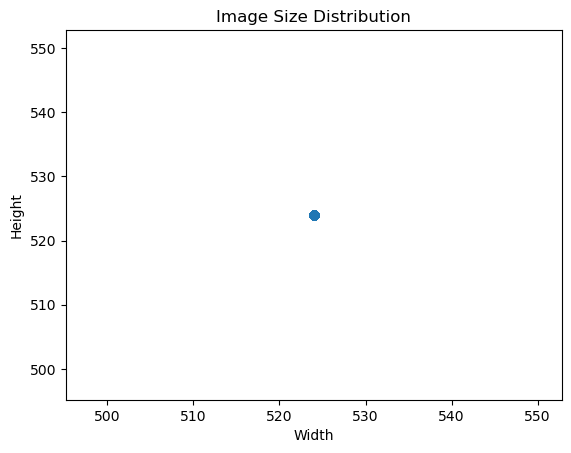

In [3]:
from PIL import Image
import os
import matplotlib.pyplot as plt

# into RealWaste folder
realwaste_path = "realwaste-main/RealWaste"

# store image sizes for each category
image_sizes = []

# through each subfolder
for category_folder in os.listdir(realwaste_path):
    category_path = os.path.join(realwaste_path, category_folder)

    if os.path.isdir(category_path):
        # store image sizes for each image in the category
        category_image_sizes = []

        # through each image in the category
        for image_file in os.listdir(category_path):
            image_path = os.path.join(category_path, image_file)

            # open the image
            with Image.open(image_path) as img:
                # size of the image
                image_size = img.size
                category_image_sizes.append(image_size)

        # append image sizes for the category to the main list
        image_sizes.append(category_image_sizes)

# flatten the list of image sizes for plotting
flat_image_sizes = [size for sublist in image_sizes for size in sublist]

# plot image size distribution
widths, heights = zip(*flat_image_sizes)
plt.scatter(widths, heights)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Image Size Distribution')
plt.show()


In [39]:
import os
from IPython.display import Image
import seaborn_image as isns
realwaste_path = "realwaste-main/RealWaste"

# through each subfolder
for category_folder in os.listdir(realwaste_path):
    category_path = os.path.join(realwaste_path, category_folder)
    num_image = 0
    random_images = []

    if os.path.isdir(category_path):

        # through each image in the category
        for image_file in os.listdir(category_path):
            num_image += 1

        random_image_nums = np.random.randint(1, num_image, size=3)
        for image_num in random_image_nums:
            random_images.append(os.path.join(category_path, f'{category_folder}_{image_num}.jpg'))
        print(category_folder + ":")
        g = isns.ImageGrid(random_images, origin="upper")
